# 분포 통계량

In [1]:
import numpy as np
from scipy import stats as st
import pandas as pd

## 백분위수 및 사분위수 계산

In [2]:
x = np.arange(1, 12, 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [3]:
print(np.percentile(x, 20))
print(np.quantile(x, 0.2))

3.0
3.0


In [4]:
print(np.percentile(x, 25))
print(np.quantile(x, 0.25))

3.5
3.5


### 왜도 계산

In [27]:
# %matplotlib inline
# from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [28]:
x1[:5]

[1, 1, 1, 1, 1]

In [29]:
pd_s = pd.Series(x1)

In [30]:
pd_s.value_counts(ascending=False) # ascending=True
# ascending = True: 오름차순 정렬, ascending = False: 내림차순 정렬

1    30
2    20
3    20
4    15
5    15
Name: count, dtype: int64

In [23]:
from matplotlib import pyplot as plt

<Axes: >

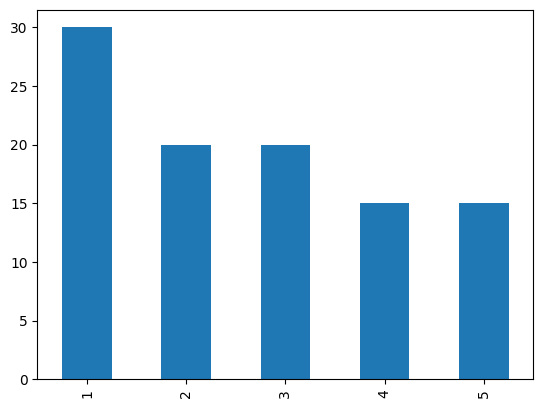

In [44]:
pd_s.value_counts(sort = False).plot(kind = 'bar')

<Axes: >

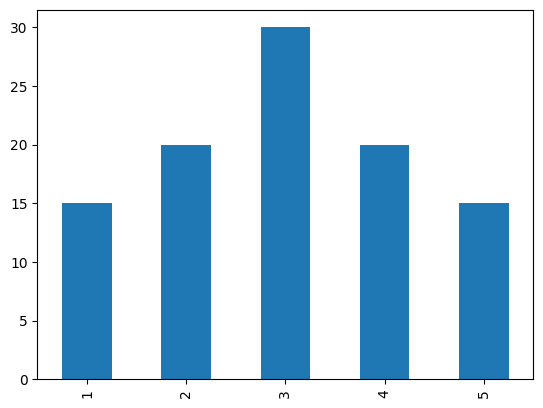

In [45]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

<Axes: >

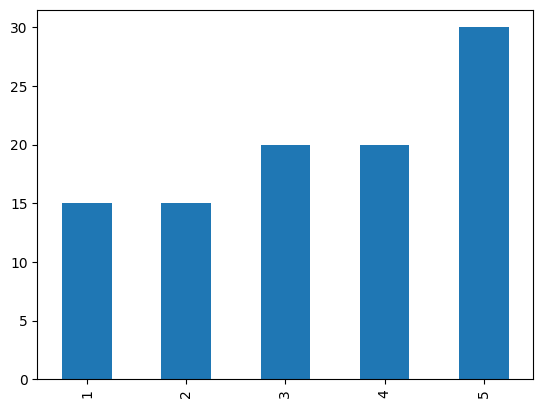

In [46]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [48]:
print("좌로 치우쳤을 때 왜도:", st.skew(x1))
print("치우치지 않았을 때 왜도:", st.skew(x2))
print("우로 치우쳤을 때 왜도:", st.skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우쳤을 때 왜도: -0.31928010084863606


### 첨도 계산

In [49]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

<Axes: >

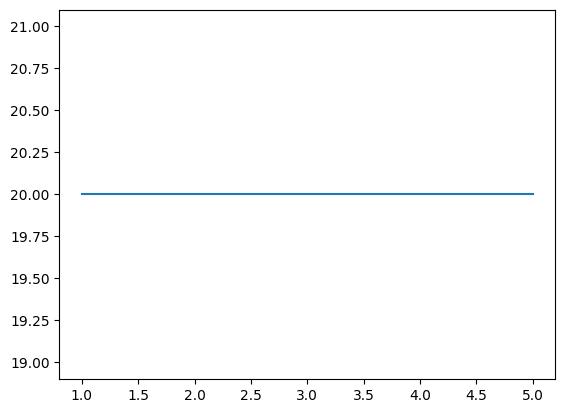

In [50]:
pd.Series(x1).value_counts(sort=False).plot(kind = 'line')

<Axes: >

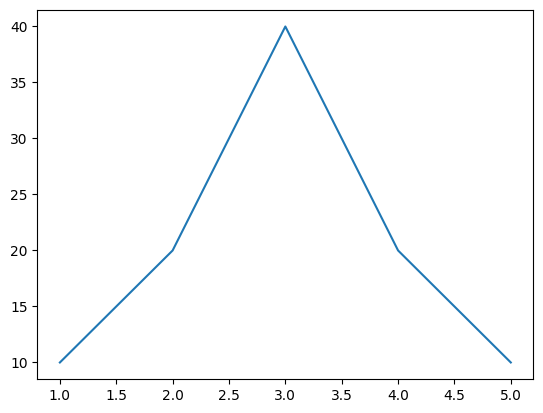

In [51]:
pd.Series(x2).value_counts(sort=False).plot(kind = 'line')

<Axes: >

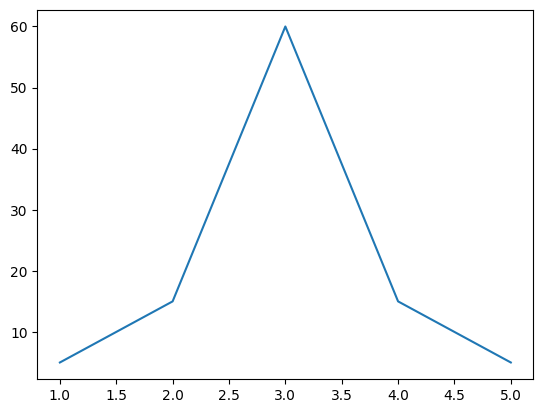

In [52]:
pd.Series(x3).value_counts(sort=False).plot(kind = 'line')

In [54]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", st.kurtosis(x1))
print("조금 뾰족할 때 첨도:", st.kurtosis(x2))
print("매우 뾰족할 때 첨도:", st.kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636


------------------------------------------------------------------------

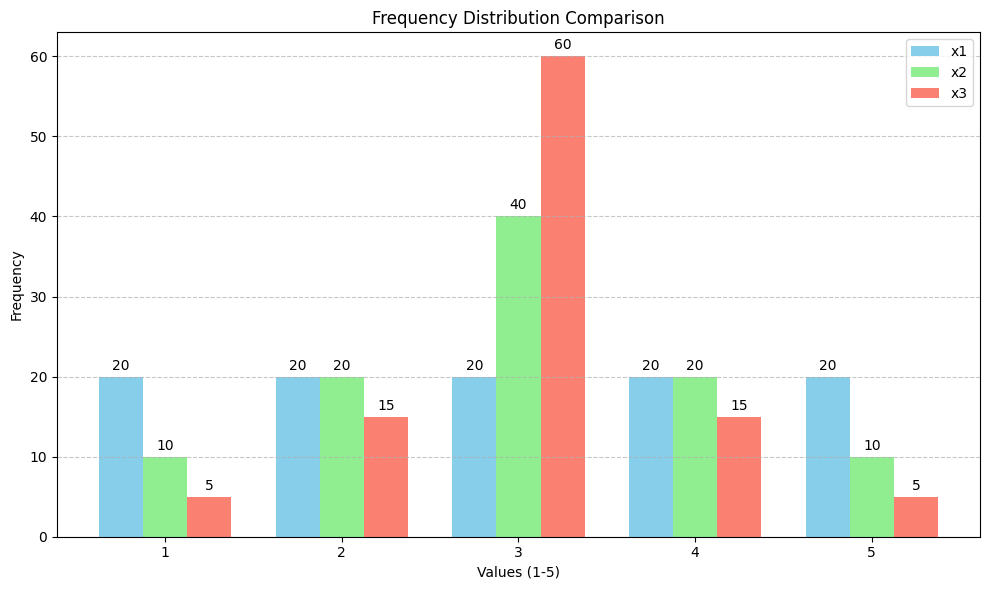

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5

# Series 변환 및 빈도
s1, s2, s3 = pd.Series(x1), pd.Series(x2), pd.Series(x3)
freq1, freq2, freq3 = s1.value_counts(sort=False), s2.value_counts(sort=False), s3.value_counts(sort=False)

# 바 차트
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25
ind = np.arange(len(freq1.index))

ax.bar(ind - width, freq1.values, width, label='x1', color='skyblue')
ax.bar(ind, freq2.values, width, label='x2', color='lightgreen')
ax.bar(ind + width, freq3.values, width, label='x3', color='salmon')

ax.set_title('Frequency Distribution Comparison')
ax.set_xlabel('Values (1-5)')
ax.set_ylabel('Frequency')
ax.set_xticks(ind)
ax.set_xticklabels(freq1.index)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 막대 위에 값 표시
for bars, freq in zip([ax.patches[:5], ax.patches[5:10], ax.patches[10:]], [freq1, freq2, freq3]):
    for bar, val in zip(bars, freq.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, val, ha='center', va='bottom')

plt.tight_layout()
plt.show()